# Research: Best model for text genre prediction

## Load text

In [0]:
!mkdir /content/drive

mkdir: cannot create directory ‘/content/drive’: File exists


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/AI")

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [0]:
genres = ['ADVENTUR', 'DETECT', 'FANTAST', 'JOURNAL', 'TALES']

In [0]:
# !unzip ./homework4/*.zip
# !find ./ENGLISH/. -name '*.ZIP' -execdir unzip '{}' ';'

In [0]:
import glob
path = 'homework4/ENGLISH/'
texts = {}

for genre in genres:
  texts[genre] = {}
  inpath = path + genre
  for filename in glob.glob(os.path.join(inpath, '*.TXT')):    
    try:
      with open(filename, 'r', encoding='utf-8') as f:      
        texts[genre][filename.split('/')[-1]] = ''.join(f.readlines())
      print(filename)
    except:      
      with open(filename, 'r', encoding='latin-1') as f:      
        texts[genre][filename.split('/')[-1]] = ''.join(f.readlines())
      print(filename)

homework4/ENGLISH/ADVENTUR/CLOVIS.TXT
homework4/ENGLISH/ADVENTUR/CALLWILD.TXT
homework4/ENGLISH/ADVENTUR/JUSTDAV.TXT
homework4/ENGLISH/ADVENTUR/CANSUCH.TXT
homework4/ENGLISH/ADVENTUR/FIRE.TXT
homework4/ENGLISH/ADVENTUR/DOUGLASS.TXT
homework4/ENGLISH/ADVENTUR/MOBYDICK.TXT
homework4/ENGLISH/ADVENTUR/EIGHTY_D.TXT
homework4/ENGLISH/ADVENTUR/CAROLCHR.TXT
homework4/ENGLISH/ADVENTUR/OPION.TXT
homework4/ENGLISH/ADVENTUR/DOUGL2.TXT
homework4/ENGLISH/ADVENTUR/ALEXBR.TXT
homework4/ENGLISH/ADVENTUR/HFINN.TXT
homework4/ENGLISH/ADVENTUR/IVANHOE.TXT
homework4/ENGLISH/ADVENTUR/PUDDN.TXT
homework4/ENGLISH/ADVENTUR/SAWY2.TXT
homework4/ENGLISH/ADVENTUR/SAWY3.TXT
homework4/ENGLISH/ADVENTUR/SAWY1.TXT
homework4/ENGLISH/ADVENTUR/TARZ1.TXT
homework4/ENGLISH/ADVENTUR/TARZ2.TXT
homework4/ENGLISH/ADVENTUR/TARZ3.TXT
homework4/ENGLISH/ADVENTUR/TARZ4.TXT
homework4/ENGLISH/ADVENTUR/TARZ5.TXT
homework4/ENGLISH/ADVENTUR/LORD_JIM.TXT
homework4/ENGLISH/ADVENTUR/SHARERXT.TXT
homework4/ENGLISH/ADVENTUR/2CITY.TXT
homework4

In [0]:
tcount = 0
for genre in texts:
  print(genre + " : " + str(len(texts[genre])))
  tcount += len(texts[genre])
print('-----')
print('Total :', str(tcount))

ADVENTUR : 39
DETECT : 23
FANTAST : 75
JOURNAL : 8
TALES : 20
-----
Total : 165


In [0]:
# Split texts to train and test subsets

import random

train_texts = {}
test_texts = {}
train_num = 0


for genre in texts:
  train_texts[genre] = {}
  test_texts[genre] = {}
  train_num = int(len(texts[genre])*0.8)
  train_sample = random.sample(texts[genre].keys(), train_num)
  for text in texts[genre]:
    if text in train_sample:
      train_texts[genre][text] = texts[genre][text]
    else:
      test_texts[genre][text] = texts[genre][text]

      
print('Train texts:')      
tcount = 0
for genre in train_texts:
  print(genre + " : " + str(len(train_texts[genre])))
  tcount += len(train_texts[genre])
print('-----')
print('Total :', str(tcount))  

print('\n')    

print('Test texts:')      
tcount = 0
for genre in test_texts:
  print(genre + " : " + str(len(test_texts[genre])))
  tcount += len(test_texts[genre])
print('-----')
print('Total :', str(tcount)) 

Train texts:
ADVENTUR : 31
DETECT : 18
FANTAST : 60
JOURNAL : 6
TALES : 16
-----
Total : 131


Test texts:
ADVENTUR : 8
DETECT : 5
FANTAST : 15
JOURNAL : 2
TALES : 4
-----
Total : 34


In [0]:
df_train = pd.DataFrame(columns=['text', 'genre'])
df_test = pd.DataFrame(columns=['text', 'genre'])

for genre in train_texts:
  for text in train_texts[genre]:
    df_train = df_train.append({'text': train_texts[genre][text], 'genre': genre}, ignore_index=True)

for genre in test_texts:
  for text in test_texts[genre]:
    df_test = df_test.append({'text': test_texts[genre][text], 'genre': genre}, ignore_index=True)    

In [0]:
df_train.shape

(131, 2)

In [0]:
df_test.shape

(34, 2)

In [0]:
df_train.head(10)

,text,genre
0,The Call of the Wild\n by Jack London...,ADVENTUR
1,"\nJUST DAVID, by ELEANOR H. PORTER\n\nDigitize...",ADVENTUR
2,\n The Internet Wiretap Electronic Edition ...,ADVENTUR
3,\n NARRATIVE OF THE LIFE OF FRE...,ADVENTUR
4,\n Herman Melville...,ADVENTUR
5,\n Jules VERNE\...,ADVENTUR
6,\n\n\n\n\n A CHRISTMAS ...,ADVENTUR
7,"\n\n\nDouglass, Frederick. ""My Escape from Sl...",ADVENTUR
8,\n\n\nAlexander's Bridge by Willa Cather\n\n\n...,ADVENTUR
9,\n THE ADVENTURES OF HUCKLEBERRY FINN\...,ADVENTUR


## Clean text

In [0]:
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import re
from nltk.tag import pos_tag
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(sentence):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
  
def clean_text_lemma(text, lemma=True): 
    ''' 
    Utility function to clean text by removing links, special characters 
    using simple regex statements. Also converting words to lemmas.
    '''    
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Clean the text
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    stripped_text = re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT\s)", " ", text).lower().split()
    lemma_text = lemmatize_all(stripped_text)
    filtered_text = [word for word in lemma_text if word not in stopWords]    
    join_text = ' '.join(filtered_text)
    
    global count
    print('text {} cleaned'.format(count))
    count += 1
    
    return join_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
count = 1
df_train['clean_text'] = df_train['text'].apply(clean_text_lemma)

In [0]:
count = 1
df_test['clean_text'] = df_test['text'].apply(clean_text_lemma)

text 1 cleaned
text 2 cleaned
text 3 cleaned
text 4 cleaned
text 5 cleaned
text 6 cleaned
text 7 cleaned
text 8 cleaned
text 9 cleaned
text 10 cleaned
text 11 cleaned
text 12 cleaned
text 13 cleaned
text 14 cleaned
text 15 cleaned
text 16 cleaned
text 17 cleaned
text 18 cleaned
text 19 cleaned
text 20 cleaned
text 21 cleaned
text 22 cleaned
text 23 cleaned
text 24 cleaned
text 25 cleaned
text 26 cleaned
text 27 cleaned
text 28 cleaned
text 29 cleaned
text 30 cleaned
text 31 cleaned
text 32 cleaned
text 33 cleaned
text 34 cleaned


In [0]:
# Save dataframe to file to use it again
import pickle

def save_obj(obj, name):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [0]:
#save_obj(df_train, "text_data3")
df_train = load_obj("text_data2")

#save_obj(df_test, "text_test_data3")
df_test = load_obj("text_test_data2")

print(len(df_train))
print(len(df_test))

131
34


In [0]:
import gensim

## Convert words to vectors

In [0]:
all_texts = np.concatenate((df_train['clean_text'].values, df_test['clean_text'].values))
len(all_texts)

165

In [0]:
word_list = []
for value in all_texts:
  word_list.append(value.split())

In [0]:

# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

#model = gensim.models.Word2Vec(word_list, window=5, min_count=1, size=300)

In [0]:
#model.most_similar('work')

In [0]:
#print('Found %s word vectors of word2vec' % len(model.wv.vocab))

In [0]:
import re
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, SimpleRNN, Activation, Dense, Dropout, Input, Embedding, Flatten
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras import backend as K
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
df_train['text_len'] = df_train['clean_text'].apply(lambda x: len(x.split()))
df_test['text_len'] = df_test['clean_text'].apply(lambda x: len(x.split()))

In [0]:
df_train['short_text'] = df_train['clean_text'].apply(lambda x: ' '.join(x.split()[0:1000]))
df_test['short_text'] = df_train['clean_text'].apply(lambda x: ' '.join(x.split()[0:1000]))

In [0]:
# split long texts into a number of short parts

df_seq = pd.DataFrame(columns=['short_text', 'genre'])

def make_seq(text, genre):
  unit = 1000
  seq = text.split()
  k = len(seq) // unit
  
  global df_seq
  
  for i in range(0, k):
    df_seq = df_seq.append({'short_text': ' '.join(seq[i*unit:(i+1)*unit]), 'genre': genre}, ignore_index=True)

for genre in genres:
  df_train[df_train['genre'] == genre]['clean_text'].apply(lambda x: make_seq(x, genre))

In [0]:
# also split test texts

df_seq_test = pd.DataFrame(columns=['short_text', 'genre'])

def make_seq(text, genre):
  unit = 1000
  seq = text.split()
  k = len(seq) // unit
  
  global df_seq_test
  
  for i in range(0, k):
    df_seq_test = df_seq_test.append({'short_text': ' '.join(seq[i*unit:(i+1)*unit]), 'genre': genre}, ignore_index=True)

for genre in genres:
  df_test[df_test['genre'] == genre]['clean_text'].apply(lambda x: make_seq(x, genre))

In [0]:
df_seq['genre'].value_counts()

FANTAST     1159
ADVENTUR     943
JOURNAL      935
DETECT       694
TALES        325
Name: genre, dtype: int64

In [0]:
df_seq_test['genre'].value_counts()

ADVENTUR    342
FANTAST     284
DETECT      195
TALES       137
JOURNAL      43
Name: genre, dtype: int64

In [0]:
#make train dataset more balansed
df_balanced = pd.DataFrame(columns=['genre', 'short_text'])
df_balanced_test = pd.DataFrame(columns=['genre', 'short_text'])

genres2 = ['ADVENTUR', 'DETECT', 'FANTAST', 'JOURNAL', 'TALES']

for genre in genres2:
  df_balanced = df_balanced.append(df_seq[df_seq['genre'] == genre][['short_text', 'genre']][0:400], ignore_index=True)
  
for genre in genres2:
  df_balanced_test = df_balanced_test.append(df_seq_test[df_seq_test['genre'] == genre][['short_text', 'genre']][0:100], ignore_index=True)  

df_balanced['text_len'] = df_balanced['short_text'].apply(lambda x: len(x.split()))  
df_balanced_test['text_len'] = df_balanced_test['short_text'].apply(lambda x: len(x.split()))
  
print(df_balanced.shape)
  
df_balanced.head(15)

(1925, 3)


,genre,short_text,text_len
0,ADVENTUR,chronicle clovis saki h h munro obi h h munro ...,1000
1,ADVENTUR,joke thing really people know people meet thin...,1000
2,ADVENTUR,devonshire home major barfield plunge heavily ...,1000
3,ADVENTUR,memsahib shoot mother carry baby home jungle d...,1000
4,ADVENTUR,servant burst heel gardener still clutch sickl...,1000
5,ADVENTUR,find attractive prospect put ballot paper box ...,1000
6,ADVENTUR,stammer huddle one respected men country list ...,1000
7,ADVENTUR,isobel saying clever luckily bear repeat sure ...,1000
8,ADVENTUR,fault one discourage much history one family o...,1000
9,ADVENTUR,present guest dish bring pitch perfection almo...,1000


In [0]:
print(df_balanced_test.shape)
df_balanced_test.head(10)

(443, 3)


,genre,short_text,text_len
0,ADVENTUR,revise combat arm bbs p box 913 portland orego...,1000
1,ADVENTUR,upon several similar trap usually snow hidden ...,1000
2,ADVENTUR,timer sulphur creek right trail mate would dan...,1000
3,ADVENTUR,winged mercury wonder mercury felt felt skim e...,1000
4,ADVENTUR,herman melville moby dick 1 loomings call ishm...,1000
5,ADVENTUR,whale attend marvel thousand patagonian sight ...,1000
6,ADVENTUR,picture represent cape horner great hurricane ...,1000
7,ADVENTUR,space wall leave little interval back settle s...,1000
8,ADVENTUR,old chest middle room take new zealand head gh...,1000
9,ADVENTUR,still hug tightly though naught death part us ...,1000


In [0]:
df_train['text_len'].mean()

31448.045801526718

In [0]:
X = df_balanced.short_text
X_test = df_balanced_test.short_text 
Y = df_balanced.genre
Y_test = df_balanced_test.genre
le = LabelEncoder()
le = le.fit(Y)
Y = le.transform(Y)
Y_test = le.transform(Y_test)

In [0]:
Y_train = to_categorical(Y)
Y_test = to_categorical(Y_test)
print(Y_train[1])
print(Y_test[2])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [0]:
MAX_WORDS = 90000
tok = Tokenizer(num_words=MAX_WORDS)
tok.fit_on_texts(all_texts)
sequences = tok.texts_to_sequences(X)
sequences_test = tok.texts_to_sequences(X_test)
word_index = tok.word_index
print('Found %s unique tokens' % len(word_index))

Found 97264 unique tokens


In [0]:
MAX_SEQUENCE_LENGTH = 1000
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(sequences_matrix)
print('Shape of data tensor:', sequences_matrix.shape)

[[ 4174  4147 25242 ...   182     1   929]
 [ 1575    28   170 ...   205     4    28]
 [ 8890   146  1034 ...   480   300  3829]
 ...
 [    0    49    85 ...   701   328  2803]
 [    0     0    23 ...  1585   470 15397]
 [   85   778    38 ...  3320 20822  3028]]
Shape of data tensor: (1925, 1000)


In [0]:
print(len(sequences[2]))

1000


In [0]:
sequences_matrix_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print(sequences_matrix_test)
print('Shape of data tensor:', sequences_matrix_test.shape)

[[    0     0     0 ...    21   131     5]
 [    0    17   269 ...  1325   246    35]
 [10371 10329  3199 ...   293   921    11]
 ...
 [   42    48   484 ...    68   743  3321]
 [ 3996   183  1275 ... 13864  1189  2954]
 [    0   257   455 ...   768   537   407]]
Shape of data tensor: (443, 1000)


In [0]:
nb_words = min(MAX_WORDS, len(word_index))+1
print(nb_words)

90001


In [0]:
EMBEDDING_DIM = 200

In [0]:
'''
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in model.wv.vocab:
        embedding_matrix[i] = model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
'''

## Using model with LSTM layer

In [0]:
#shuffle data

indices = np.arange(len(sequences))
np.random.shuffle(indices)
sequences_matrix = sequences_matrix[indices]
Y_train = Y_train[indices]
Y_train[1]

array([1., 0., 0., 0., 0.], dtype=float32)

In [0]:
inputs = Input(shape=(MAX_SEQUENCE_LENGTH, ))

# embedding_layer = Embedding(nb_words, EMBEDDING_DIM, weights=[embedding_matrix],
#                       input_length=MAX_SEQUENCE_LENGTH, trainable=False)(inputs)

embedding_layer = Embedding(nb_words,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 1000, 200)         18000200  
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                67840     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 645       
Total params: 18,077,005
Trainable params: 18,077,005
Non-trainable params: 0
________________________________________________________________

In [0]:
hist = model_lstm.fit([sequences_matrix], Y_train, batch_size=100, epochs=10, validation_split=0.2)

Train on 1540 samples, validate on 385 samples
Epoch 1/10
1540/1540 [==============================] - 40s 26ms/step - loss: 1.5820 - acc: 0.2786 - val_loss: 1.5099 - val_acc: 0.4078
Epoch 2/10
1540/1540 [==============================] - 38s 25ms/step - loss: 1.2721 - acc: 0.4422 - val_loss: 1.2217 - val_acc: 0.3844
Epoch 3/10
1540/1540 [==============================] - 37s 24ms/step - loss: 1.0678 - acc: 0.5279 - val_loss: 1.0929 - val_acc: 0.5039
Epoch 4/10
1540/1540 [==============================] - 36s 24ms/step - loss: 0.9421 - acc: 0.6701 - val_loss: 1.2282 - val_acc: 0.5325
Epoch 5/10
1540/1540 [==============================] - 36s 23ms/step - loss: 0.6725 - acc: 0.8558 - val_loss: 0.8622 - val_acc: 0.6286
Epoch 6/10
1540/1540 [==============================] - 36s 23ms/step - loss: 0.4503 - acc: 0.8987 - val_loss: 0.8687 - val_acc: 0.6468
Epoch 7/10
1540/1540 [==============================] - 36s 23ms/step - loss: 0.2735 - acc: 0.9338 - val_loss: 0.8273 - val_acc: 0.6701
E

In [0]:
#model_lstm.save('model_lstm87.h5')

In [0]:
# load saved model with best perfomance

from keras.models import load_model


# returns a compiled model

model_best = load_model('model_lstm87.h5')
model_best.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_55 (Embedding)     (None, 1000, 200)         18000200  
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                67840     
_________________________________________________________________
dense_95 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 5)                 645       
Total params: 18,077,005
Trainable params: 18,077,005
Non-trainable params: 0
________________________________________________________________

In [0]:
model_lstm = model_best

## Evaluate model

In [0]:
# convert model predictions to genre labels
def to_labels(y_list):
  Y_labels = [np.argmax(y, axis=None, out=None) for y in y_list]
  Y_labels = le.inverse_transform(Y_labels)
  return Y_labels

In [0]:
Y_predicted = model_lstm.predict(sequences_matrix_test)

In [0]:
Y_plabels = to_labels(Y_predicted)
Y_plabels[0:100]

array(['ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'FANTAST', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'FANTAST', 'FANTAST', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'FANTAST', 'FANTAST',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'FANTAST', 'ADVENTUR',
       'DETECT', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
   

In [0]:
Y_labels = df_balanced_test.genre.values

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(Y_labels, Y_plabels))

Classification Report:
              precision    recall  f1-score   support

    ADVENTUR       0.42      0.92      0.57       100
      DETECT       0.88      0.75      0.81       100
     FANTAST       0.87      0.48      0.62       100
     JOURNAL       0.76      0.95      0.85        43
       TALES       0.97      0.28      0.43       100

   micro avg       0.64      0.64      0.64       443
   macro avg       0.78      0.68      0.66       443
weighted avg       0.78      0.64      0.63       443



In [0]:
## Evaluate model

accr = model_lstm.evaluate([sequences_matrix_test], Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

443/443 [==============================] - 11s 25ms/step
Test set
  Loss: 2.459
  Accuracy: 0.695


In [0]:
import itertools
%matplotlib inline
from matplotlib import pyplot as plt
	
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = confusion_matrix(Y_labels, Y_plabels, labels=genres2)
print(cnf_matrix)

[[64  7 24  0  5]
 [ 4 86  1  0  9]
 [13 14 56  3 14]
 [ 0  1 10 32  0]
 [28  2  0  0 70]]


Confusion matrix, without normalization


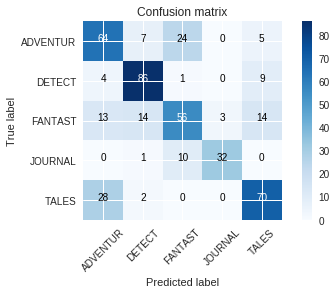

In [0]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=False,  title='Confusion matrix')

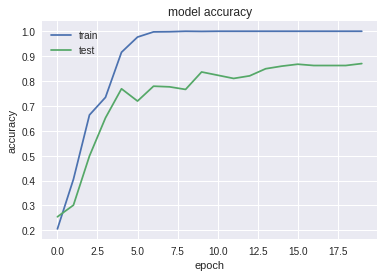

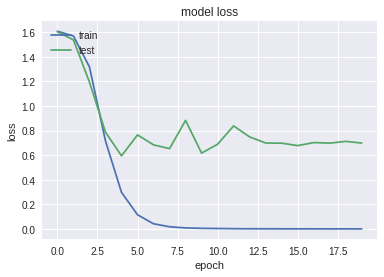

In [0]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Genre Prediction Function

In [0]:
def neuro_predict(clean_text, model=model_lstm, seq_len=1000):
  '''
  Predicts text genre with help of LSTM Network
  Limitation: text should be at least 1000 words long
  '''  
  seq = clean_text.split()
  
  if len(seq) < 1000:
    for i in range(1000 - len(seq)):
      seq.append('nullword')
  
  parts = []
  unit = seq_len  
  k = len(seq) // unit
  
  for i in range(0, k):
    parts.append(' '.join(seq[i*unit:(i+1)*unit]))
  
  sequences = tok.texts_to_sequences(parts)
  sequences_matrix = pad_sequences(sequences, maxlen=seq_len)
  
  prediction = model.predict(sequences_matrix)
  labels = to_labels(prediction)
  
  rating = {}
  for label in labels:
    if label not in rating:
      rating[label] = 1      
    else:
      rating[label] += 1

  sorted_rating = sorted(rating.items(), key=lambda x: x[1], reverse=True)
  
  return sorted_rating[0][0]

In [0]:
m = neuro_predict(df_test['clean_text'][4], model_lstm, 1000)
m

'ADVENTUR'

In [0]:
neuro_predict('Kill Bill', model_lstm, 1000)

'FANTAST'

In [0]:
df_test['prediction'] = df_test['clean_text'].apply(lambda x: neuro_predict(x, model_lstm, 1000))

In [0]:
print('Classification Report for Genre Prediction Function:')
print(classification_report(df_test['genre'], df_test['prediction']))

Classification Report for Genre Prediction Function:
              precision    recall  f1-score   support

    ADVENTUR       0.62      1.00      0.76         8
      DETECT       0.83      1.00      0.91         5
     FANTAST       0.89      0.53      0.67        15
     JOURNAL       0.67      1.00      0.80         2
       TALES       0.67      0.50      0.57         4

   micro avg       0.74      0.74      0.74        34
   macro avg       0.73      0.81      0.74        34
weighted avg       0.78      0.74      0.72        34



## Using BoW Model and Dense Neural Network

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(all_texts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
len(vectorizer.vocabulary_)

97236

In [0]:
X_bow = df_train.clean_text.values
X_bow_test = df_test.clean_text.values 
Y_bow = df_train.genre
Y_bow_test = df_test.genre
le = LabelEncoder()
le = le.fit(Y_bow)
Y_bow = le.transform(Y_bow)
Y_bow_test = le.transform(Y_bow_test)

In [0]:
X_bow.shape

(131,)

In [0]:
X_bow_train = vectorizer.transform(X_bow)
X_bow_test  = vectorizer.transform(X_bow_test)
X_bow_train

<131x97236 sparse matrix of type '<class 'numpy.int64'>'
	with 579208 stored elements in Compressed Sparse Row format>

In [0]:
Y_bow_train = to_categorical(Y_bow)
Y_bow_test = to_categorical(Y_bow_test)
print(Y_bow_train[1])
print(Y_bow_test[2])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [0]:
#Define Dense model

from keras.models import Sequential
from keras import layers

input_dim = X_bow_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(40, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 40)                3889480   
_________________________________________________________________
dense_53 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 55        
Total params: 3,891,075
Trainable params: 3,891,075
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_bow_train, Y_bow_train, epochs=15, verbose=True, batch_size=10)

Epoch 1/15
131/131 [==============================] - 1s 11ms/step - loss: 1.4345 - acc: 0.7496
Epoch 2/15
131/131 [==============================] - 0s 2ms/step - loss: 0.9340 - acc: 0.7893
Epoch 3/15
131/131 [==============================] - 0s 2ms/step - loss: 0.5827 - acc: 0.8779
Epoch 4/15
131/131 [==============================] - 0s 2ms/step - loss: 0.3892 - acc: 0.9084
Epoch 5/15
131/131 [==============================] - 0s 2ms/step - loss: 0.3789 - acc: 0.9084
Epoch 6/15
131/131 [==============================] - 0s 2ms/step - loss: 0.3045 - acc: 0.9160
Epoch 7/15
131/131 [==============================] - 0s 2ms/step - loss: 0.1220 - acc: 0.9450
Epoch 8/15
131/131 [==============================] - 0s 2ms/step - loss: 0.0810 - acc: 0.9695
Epoch 9/15
131/131 [==============================] - 0s 2ms/step - loss: 0.0711 - acc: 0.9695
Epoch 10/15
131/131 [==============================] - 0s 2ms/step - loss: 0.0585 - acc: 0.9710
Epoch 11/15
131/131 [===========================

In [0]:
loss, accuracy = model.evaluate(X_bow_test, Y_bow_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9000


In [0]:
model.save('model_dense90.h5')

In [0]:
# convert model predictions to genre labels
def to_labels(y_list):
  Y_labels = [np.argmax(y, axis=None, out=None) for y in y_list]
  Y_labels = le.inverse_transform(Y_labels)
  return Y_labels

Y_predicted = model.predict(X_bow_test)
Y_plabels = to_labels(Y_predicted)
Y_plabels


array(['FANTAST', 'FANTAST', 'DETECT', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'DETECT', 'DETECT', 'DETECT', 'DETECT',
       'DETECT', 'ADVENTUR', 'FANTAST', 'FANTAST', 'ADVENTUR', 'FANTAST',
       'FANTAST', 'FANTAST', 'DETECT', 'ADVENTUR', 'FANTAST', 'FANTAST',
       'FANTAST', 'FANTAST', 'JOURNAL', 'FANTAST', 'JOURNAL', 'JOURNAL',
       'ADVENTUR', 'TALES', 'TALES', 'FANTAST'], dtype=object)

In [0]:
Y_labels = df_test.genre.values
Y_labels

array(['ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'DETECT', 'DETECT', 'DETECT',
       'DETECT', 'DETECT', 'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST',
       'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST',
       'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST', 'FANTAST', 'JOURNAL',
       'JOURNAL', 'TALES', 'TALES', 'TALES', 'TALES'], dtype=object)

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(Y_labels, Y_plabels))

Classification Report:
              precision    recall  f1-score   support

    ADVENTUR       0.56      0.62      0.59         8
      DETECT       0.71      1.00      0.83         5
     FANTAST       0.77      0.67      0.71        15
     JOURNAL       0.67      1.00      0.80         2
       TALES       1.00      0.50      0.67         4

   micro avg       0.71      0.71      0.71        34
   macro avg       0.74      0.76      0.72        34
weighted avg       0.73      0.71      0.70        34



In [0]:
cnf_matrix = confusion_matrix(Y_labels, Y_plabels, labels=genres)
print(cnf_matrix)

[[ 5  1  2  0  0]
 [ 0  5  0  0  0]
 [ 3  1 10  1  0]
 [ 0  0  0  2  0]
 [ 1  0  1  0  2]]


Confusion matrix, without normalization


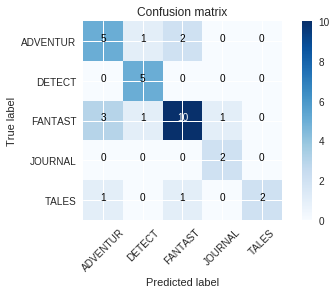

In [0]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=False,  title='Confusion matrix')

## Using Embeddings with MaxPoling layer

In [0]:
X = df_balanced.short_text
X_test = df_balanced_test.short_text 
Y = df_balanced.genre
Y_test = df_balanced_test.genre
le = LabelEncoder()
le = le.fit(Y)
Y = le.transform(Y)
Y_test = le.transform(Y_test)

Y_train = to_categorical(Y)
Y_test = to_categorical(Y_test)
print(Y_train[1])
print(Y_test[2])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [0]:
MAX_WORDS = 90000
tok = Tokenizer(num_words=MAX_WORDS)
tok.fit_on_texts(all_texts)
sequences = tok.texts_to_sequences(X)
sequences_test = tok.texts_to_sequences(X_test)
word_index = tok.word_index
print('Found %s unique tokens' % len(word_index))

Found 97264 unique tokens


In [0]:
MAX_SEQUENCE_LENGTH = 1000
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(sequences_matrix)
print('Shape of data tensor:', sequences_matrix.shape)

[[ 4174  4147 25242 ...   182     1   929]
 [ 1575    28   170 ...   205     4    28]
 [ 8890   146  1034 ...   480   300  3829]
 ...
 [    0    49    85 ...   701   328  2803]
 [    0     0    23 ...  1585   470 15397]
 [   85   778    38 ...  3320 20822  3028]]
Shape of data tensor: (1925, 1000)


In [0]:
sequences_matrix_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print(sequences_matrix_test)
print('Shape of data tensor:', sequences_matrix_test.shape)

[[    0     0     0 ...    21   131     5]
 [    0    17   269 ...  1325   246    35]
 [10371 10329  3199 ...   293   921    11]
 ...
 [   42    48   484 ...    68   743  3321]
 [ 3996   183  1275 ... 13864  1189  2954]
 [    0   257   455 ...   768   537   407]]
Shape of data tensor: (443, 1000)


In [0]:
nb_words = min(MAX_WORDS, len(word_index))+1
print(nb_words)

90001


In [0]:
EMBEDDING_DIM = 200

In [0]:
from keras.models import Sequential
from keras import layers


model = Sequential()
model.add(layers.Embedding(input_dim=nb_words, 
                           output_dim=EMBEDDING_DIM, 
                           input_length=MAX_SEQUENCE_LENGTH))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 1000, 200)         18000200  
_________________________________________________________________
global_max_pooling1d_30 (Glo (None, 200)               0         
_________________________________________________________________
dense_157 (Dense)            (None, 40)                8040      
_________________________________________________________________
dropout_54 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 30)                1230      
_________________________________________________________________
dropout_55 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 5)                 155       
Total para

In [0]:
hist = model.fit([sequences_matrix], Y_train, batch_size=50, epochs=15, validation_split=0.2)

Train on 1540 samples, validate on 385 samples
Epoch 1/15
1540/1540 [==============================] - 6s 4ms/step - loss: 0.4948 - acc: 0.8000 - val_loss: 0.5529 - val_acc: 0.8000
Epoch 2/15
1540/1540 [==============================] - 1s 664us/step - loss: 0.4837 - acc: 0.8000 - val_loss: 0.6201 - val_acc: 0.8000
Epoch 3/15
1540/1540 [==============================] - 1s 663us/step - loss: 0.4757 - acc: 0.8004 - val_loss: 0.6624 - val_acc: 0.8000
Epoch 4/15
1540/1540 [==============================] - 1s 661us/step - loss: 0.4726 - acc: 0.8000 - val_loss: 0.6818 - val_acc: 0.8000
Epoch 5/15
1540/1540 [==============================] - 1s 661us/step - loss: 0.4651 - acc: 0.8003 - val_loss: 0.7189 - val_acc: 0.8000
Epoch 6/15
1540/1540 [==============================] - 1s 655us/step - loss: 0.4596 - acc: 0.8005 - val_loss: 0.7293 - val_acc: 0.8000
Epoch 7/15
1540/1540 [==============================] - 1s 658us/step - loss: 0.4462 - acc: 0.8005 - val_loss: 0.7980 - val_acc: 0.8000
Epo

In [0]:
loss, accuracy = model.evaluate(sequences_matrix_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8605


In [0]:
# convert model predictions to genre labels
def to_labels(y_list):
  Y_labels = [np.argmax(y, axis=None, out=None) for y in y_list]
  Y_labels = le.inverse_transform(Y_labels)
  return Y_labels

Y_predicted = model.predict(sequences_matrix_test)
Y_plabels = to_labels(Y_predicted)
Y_plabels[0:100]

array(['JOURNAL', 'FANTAST', 'FANTAST', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'FANTAST', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'FANTAST',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'FANTAST',
       'FANTAST', 'ADVENTUR', 'ADVENTUR', 'FANTAST', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'FANTAST', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'DETECT', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'FANTAST', 'ADVENTUR', 'ADVENTUR',
       'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR', 'ADVENTUR',
       

In [0]:
Y_labels = df_balanced_test.genre.values

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(Y_labels, Y_plabels))

Classification Report:
              precision    recall  f1-score   support

    ADVENTUR       0.38      0.85      0.53       100
      DETECT       0.88      0.84      0.86       100
     FANTAST       0.72      0.63      0.67       100
     JOURNAL       0.82      0.77      0.80        43
       TALES       0.00      0.00      0.00       100

   micro avg       0.60      0.60      0.60       443
   macro avg       0.56      0.62      0.57       443
weighted avg       0.53      0.60      0.54       443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using model with CNN layer

In [0]:
from keras.models import Sequential
from keras import layers

In [0]:
EMBEDDING_DIM = 200

In [0]:
model = Sequential()
model.add(layers.Embedding(nb_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 1000, 200)         18000200  
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 996, 128)          128128    
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
__________

In [0]:
hist = model.fit([sequences_matrix], Y_train, batch_size=10, epochs=8, validation_split=0.2)

Train on 1540 samples, validate on 385 samples
Epoch 1/8
1540/1540 [==============================] - 7s 4ms/step - loss: 0.4788 - acc: 0.7988 - val_loss: 0.8293 - val_acc: 0.8000
Epoch 2/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.4266 - acc: 0.8110 - val_loss: 1.1261 - val_acc: 0.8031
Epoch 3/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.2853 - acc: 0.8696 - val_loss: 1.2673 - val_acc: 0.7881
Epoch 4/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.1906 - acc: 0.9149 - val_loss: 1.2371 - val_acc: 0.7512
Epoch 5/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.1010 - acc: 0.9630 - val_loss: 1.4671 - val_acc: 0.6753
Epoch 6/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.0575 - acc: 0.9817 - val_loss: 1.5573 - val_acc: 0.6956
Epoch 7/8
1540/1540 [==============================] - 5s 3ms/step - loss: 0.0409 - acc: 0.9870 - val_loss: 1.7599 - val_acc: 0.6758
Epoch 8/8
1540/1540 [=

In [0]:
loss, accuracy = model.evaluate(sequences_matrix_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8131


In [0]:
# convert model predictions to genre labels
def to_labels(y_list):
  Y_labels = [np.argmax(y, axis=None, out=None) for y in y_list]
  Y_labels = le.inverse_transform(Y_labels)
  return Y_labels

Y_predicted = model.predict(sequences_matrix_test)
Y_plabels = to_labels(Y_predicted)
Y_labels = df_balanced_test.genre.values

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(Y_labels, Y_plabels))

Classification Report:
              precision    recall  f1-score   support

    ADVENTUR       0.37      0.75      0.49       100
      DETECT       0.65      0.75      0.69       100
     FANTAST       0.54      0.49      0.51       100
     JOURNAL       0.91      0.67      0.77        43
       TALES       0.00      0.00      0.00       100

   micro avg       0.51      0.51      0.51       443
   macro avg       0.49      0.53      0.49       443
weighted avg       0.44      0.51      0.46       443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Conclusion

In the case of genre prediction - simple Bag of Words Model and neural network with Dense layers works better and learns simplier than LSTM network with several word embeddings